## Encoding - Numerical Data

In [ ]:
## Encoding the numericals data ---into---> catogorical data 

Techniue 
        1. descritization (binning)
        2. Binaryzation

### 1. Descritization (Binning) 

In [ ]:
Descritization is the process of transforming continuous variables into disctrete 
variables by creating set of contigiuous intervals that span the range of the
variables values.

    ## Why we use

    - to handle the outliers
    - to improve the value spread

In [ ]:
## EX - Age===>  23 42 57 81 ------ 100

Age 
0-10
10-20
30-40


In [ ]:
## Type of Descritization

    1. Unsupervised
        - equal width winning (uniform)
        - Equal frequencdy (quantile)
        - kmeans
    2. Supervised
        - decision tree binning

    3. Custom Binning

    

#### 1. Equal width winning (uniform)

In [ ]:
num of bins = 10 (user)

formula  ==> (max-min)/bins

23,32,84,56.......

AGe
0-10
10-20
20-30


## spread of the data ---> equal

#### 2. Equal frequencdy (quantile)

In [ ]:
num of bins/intervals = 10 (user)

each interval contains 10% of total observation

0-16
16-20
20-22
22-25

## USed
    - outlier
    - value spread uniform

#### 3. K -means Bin

In [ ]:
it make clusters form based on nearest distance . as per closest centroid 
it form the clusters. 

### # Custom/Domain Based Binning

In [ ]:
Range you decide based on requirement

Age
0-18
18-60


### Coding started.....

In [ ]:
Sklearn class ----> kbmsDiscretizal (bins,stratry(uniform,quantile,kmeans),encoding(ordinal,onehotencoding))


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(714, 3)

In [6]:
df.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.head(2)

Age     Fare
328  31.0  20.5250
73   26.0  14.4542

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6303208137715179)

In [15]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [16]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [19]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [20]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [21]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [22]:
output.sample(5)

age  age_trf   fare  fare_trf    age_labels      fare_labels
476  34.0      9.0  21.00       8.0  (32.0, 35.0]    (18.75, 26.0]
811  39.0     11.0  24.15       8.0  (38.0, 42.0]    (18.75, 26.0]
290  26.0      6.0  78.85      13.0  (25.0, 28.0]  (76.292, 108.9]
565  24.0      5.0  24.15       8.0  (23.0, 25.0]    (18.75, 26.0]
116  70.5     14.0   7.75       1.0  (54.0, 80.0]    (7.25, 7.775]

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [25]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6288732394366197)

In [26]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    


0.6373043818466353


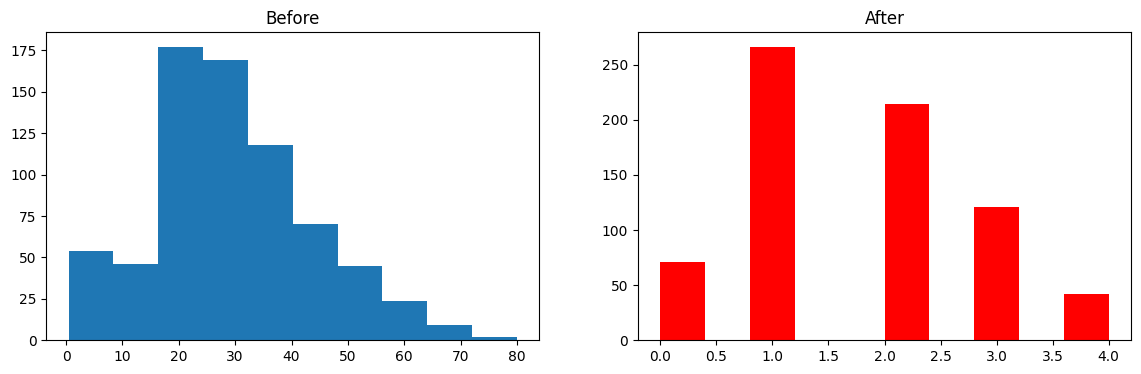

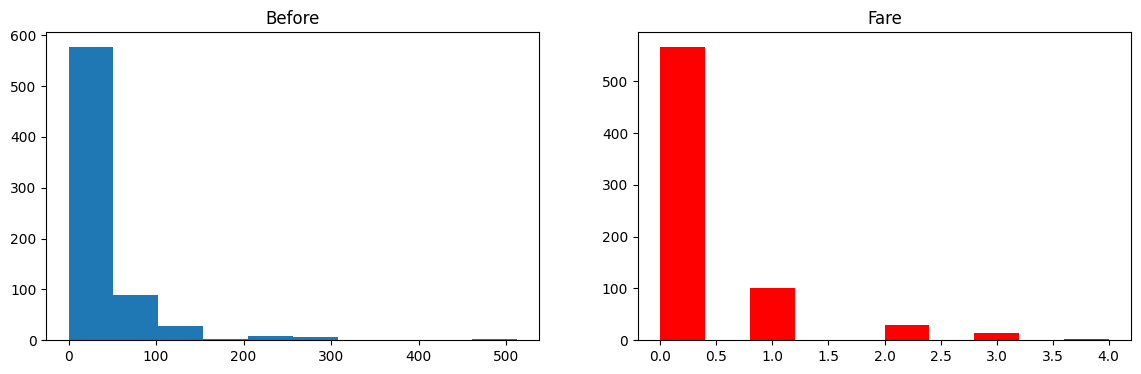

In [27]:
discretize(5,'kmeans')

0.6288928012519561


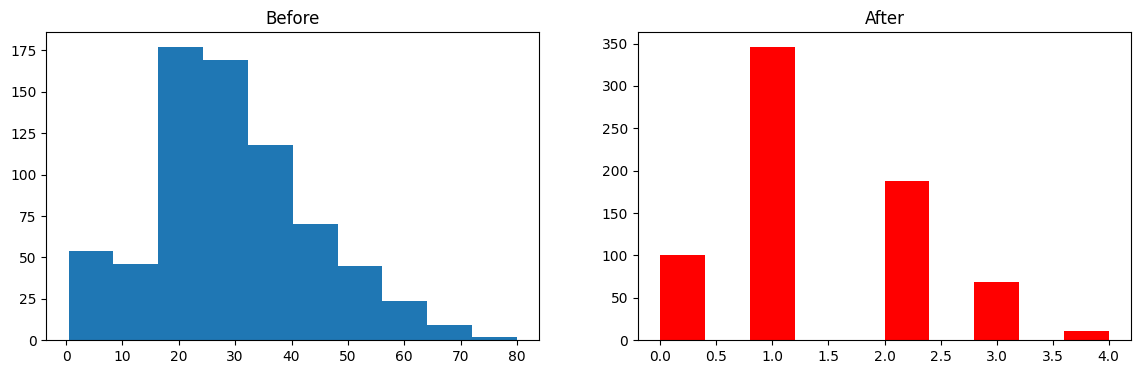

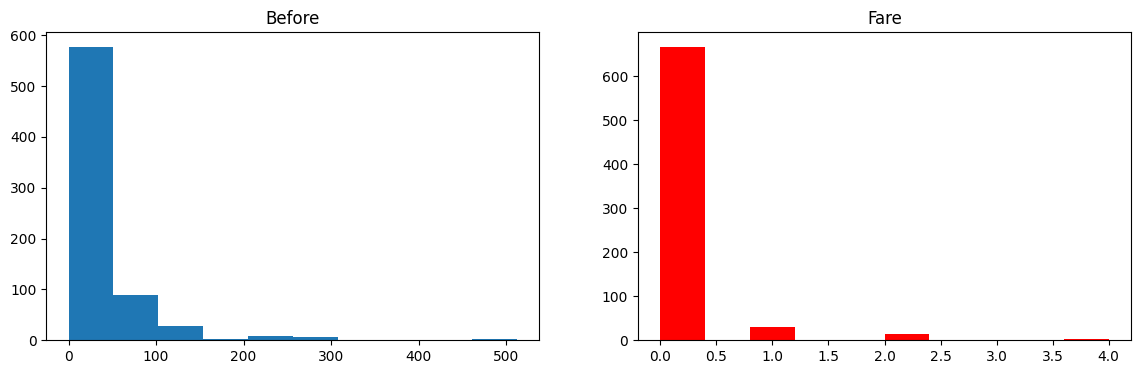

In [28]:
discretize(5,'uniform')

0.6316901408450704


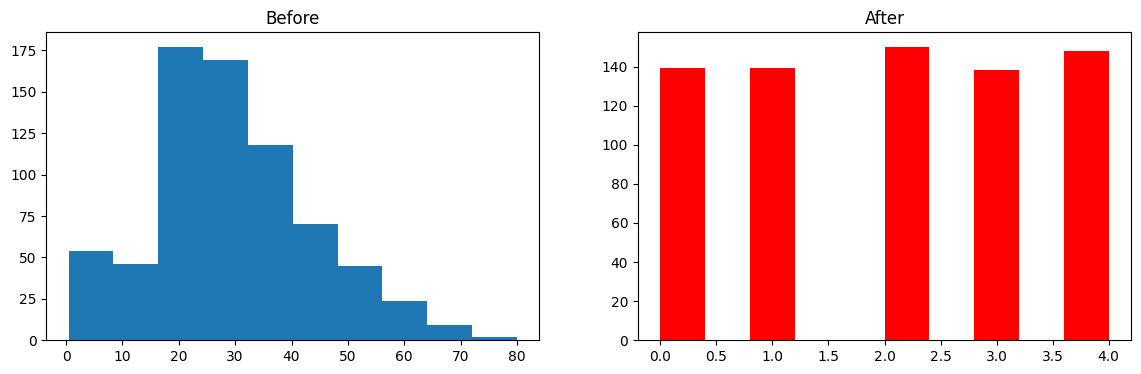

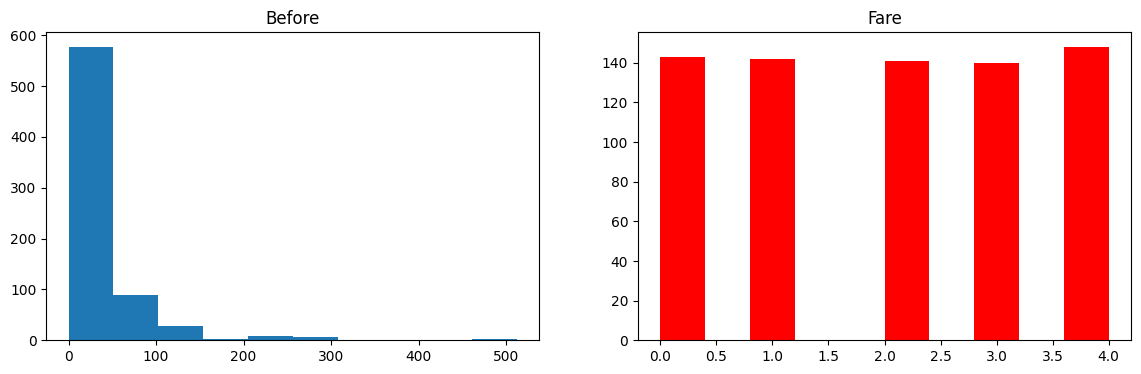

In [29]:
discretize(5,'quantile')

### 2. Binarization

In [ ]:
Continuious value into binary variable

Ex : salary <6L  no tax 
     salary > 6L tax

In [ ]:
## Sk learn ----> binaryzel (thresold,copy=true/false)

In [30]:
import numpy as np
import pandas as pd

In [31]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [32]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [33]:
df.dropna(inplace=True)

In [34]:
df['family'] = df['SibSp'] + df['Parch']

In [35]:
df.head()

Age     Fare  SibSp  Parch  Survived  family
0  22.0   7.2500      1      0         0       1
1  38.0  71.2833      1      0         1       1
2  26.0   7.9250      0      0         1       0
3  35.0  53.1000      1      0         1       1
4  35.0   8.0500      0      0         0       0

In [36]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [37]:
df.head()

Age     Fare  Survived  family
0  22.0   7.2500         0       1
1  38.0  71.2833         1       1
2  26.0   7.9250         1       0
3  35.0  53.1000         1       1
4  35.0   8.0500         0       0

In [38]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train.head()

Age     Fare  family
328  31.0  20.5250       2
73   26.0  14.4542       1
253  30.0  16.1000       1
719  33.0   7.7750       0
666  25.0  13.0000       0

### Without binarization


In [41]:

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6013986013986014

In [42]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6499804381846636)

#### # Applying Binarization

In [44]:

from sklearn.preprocessing import Binarizer

In [45]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [46]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [47]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

family   Age      Fare
0       1.0  31.0   20.5250
1       1.0  26.0   14.4542
2       1.0  30.0   16.1000
3       0.0  33.0    7.7750
4       0.0  25.0   13.0000
..      ...   ...       ...
566     1.0  46.0   61.1750
567     0.0  25.0   13.0000
568     0.0  41.0  134.5000
569     1.0  33.0   20.5250
570     0.0  33.0    7.8958

[571 rows x 3 columns]

In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [49]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

np.float64(0.62339593114241)